In [3]:
!pip install pyemd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.6/666.6 kB 12.7 MB/s eta 0:00:00


In [5]:
import numpy as np
from pyemd import emd

# Disease distributions for Class 1, Class 2, and Class 3
class_1_distribution = np.array([0.25, 0.25, 0.5], dtype=np.float64)  # Heart Disease: 0.5, Viral Infection: 0.3, Cancer: 0.2
class_2_distribution = np.array([0.25, 0.5, 0.25], dtype=np.float64)  # Heart Disease: 0.4, Viral Infection: 0.4, Cancer: 0.2
class_3_distribution = np.array([0.25, 0.25, 0.5], dtype=np.float64)  # Heart Disease: 0.6, Viral Infection: 0.2, Cancer: 0.2

# Distance matrix for the diseases (ensure the correct size)
distance_matrix = np.array([
    [0, 1, 1],  # Heart Disease to (Heart Disease, Viral Infection, Cancer)
    [1, 0, 1],  # Viral Infection to (Heart Disease, Viral Infection, Cancer)
    [1, 1, 0]   # Cancer to (Heart Disease, Viral Infection, Cancer)
], dtype=np.float64)

# Compute the Earth Mover's Distance (EMD) between Class 1 and Class 2
emd_class_1_class_2 = emd(class_1_distribution, class_2_distribution, distance_matrix)
print(f"EMD between Class 1 and Class 2: {emd_class_1_class_2}")

# Compute the Earth Mover's Distance (EMD) between Class 1 and Class 3
emd_class_1_class_3 = emd(class_1_distribution, class_3_distribution, distance_matrix)
print(f"EMD between Class 1 and Class 3: {emd_class_1_class_3}")

# Compute the Earth Mover's Distance (EMD) between Class 2 and Class 3
emd_class_2_class_3 = emd(class_2_distribution, class_3_distribution, distance_matrix)
print(f"EMD between Class 2 and Class 3: {emd_class_2_class_3}")


EMD between Class 1 and Class 2: 0.25
EMD between Class 1 and Class 3: 0.0
EMD between Class 2 and Class 3: 0.25


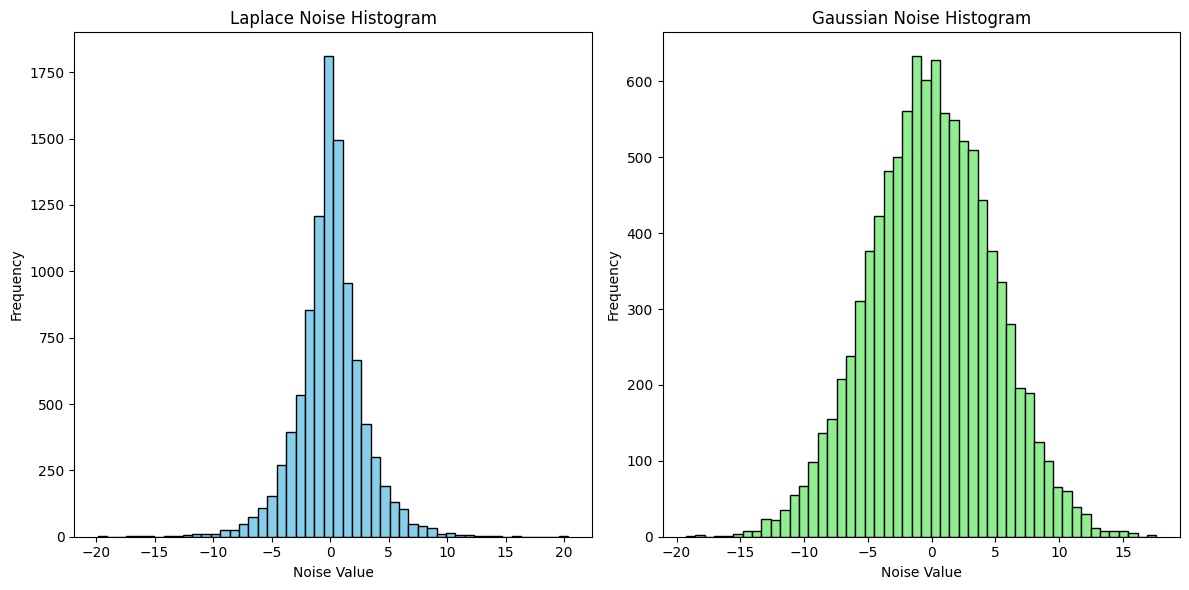

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Laplace noise
def laplace_noise(l1_sensitivity, epsilon, size):
    scale = l1_sensitivity / epsilon
    return np.random.laplace(0, scale, size)

# Function to generate Gaussian noise
def gaussian_noise(l2_sensitivity, delta, epsilon, size):
    scale = l2_sensitivity * np.sqrt(2 * np.log(1.25 / delta)) / epsilon
    return np.random.normal(0, scale, size)

# Parameters
size = 10000  # Number of samples
epsilon_laplace = 1  # Epsilon for Laplace mechanism
epsilon_gaussian = 1  # Epsilon for Gaussian mechanism
delta = 10**-5  # Delta for Gaussian mechanism

# Sensitivities
l1_sensitivity = 2  # l1-sensitivity for Laplace mechanism
l2_sensitivity = 1  # l2-sensitivity for Gaussian mechanism

# Generate noise samples
laplace_samples = laplace_noise(l1_sensitivity, epsilon_laplace, size)
gaussian_samples = gaussian_noise(l2_sensitivity, delta, epsilon_gaussian, size)

# Plot histograms
plt.figure(figsize=(12, 6))

# Laplace noise histogram
plt.subplot(1, 2, 1)
plt.hist(laplace_samples, bins=50, color='skyblue', edgecolor='black')
plt.title("Laplace Noise Histogram")
plt.xlabel("Noise Value")
plt.ylabel("Frequency")

# Gaussian noise histogram
plt.subplot(1, 2, 2)
plt.hist(gaussian_samples, bins=50, color='lightgreen', edgecolor='black')
plt.title("Gaussian Noise Histogram")
plt.xlabel("Noise Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



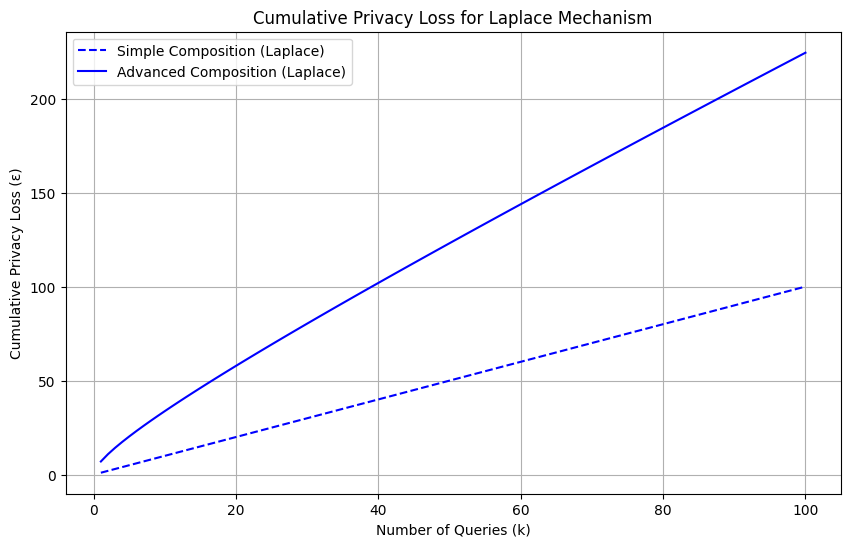

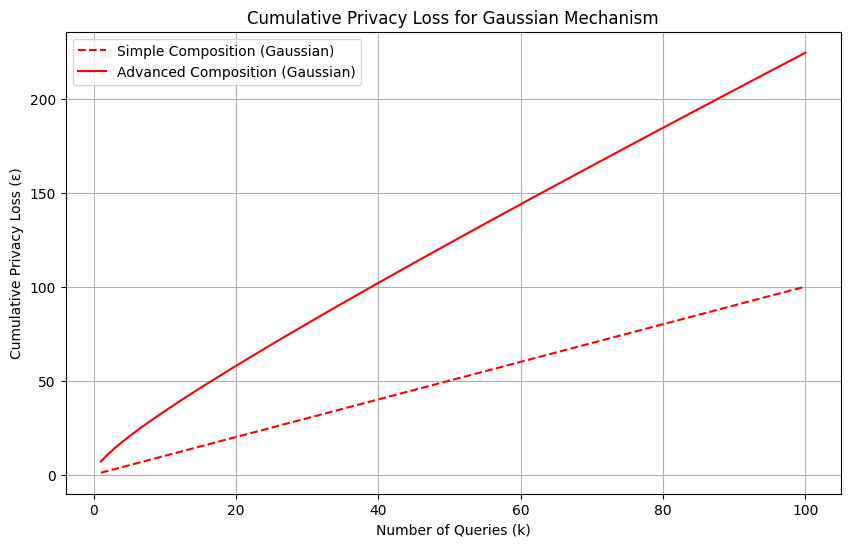

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 1  # Privacy parameter for Laplace mechanism
delta = 1e-5  # Privacy parameter for Gaussian mechanism
delta_prime = 1e-6  # Failure probability for advanced composition
k_values = np.arange(1, 101)  # Number of queries (1 to 100)

# Simple composition
def simple_composition_laplace(k, epsilon):
    return k * epsilon

def simple_composition_gaussian(k, epsilon, delta):
    return k * epsilon, k * delta

# Advanced composition
def advanced_composition_laplace(k, epsilon, delta_prime):
    return np.sqrt(2 * k * np.log(1 / delta_prime)) * epsilon + k * epsilon * (np.exp(epsilon) - 1)

def advanced_composition_gaussian(k, epsilon, delta, delta_prime):
    epsilon_cum = np.sqrt(2 * k * np.log(1 / delta_prime)) * epsilon + k * epsilon * (np.exp(epsilon) - 1)
    delta_cum = k * delta + delta_prime
    return epsilon_cum, delta_cum

# Compute cumulative privacy loss
simple_laplace = [simple_composition_laplace(k, epsilon) for k in k_values]
simple_gaussian = [simple_composition_gaussian(k, epsilon, delta) for k in k_values]
advanced_laplace = [advanced_composition_laplace(k, epsilon, delta_prime) for k in k_values]
advanced_gaussian = [advanced_composition_gaussian(k, epsilon, delta, delta_prime) for k in k_values]

# Extract epsilon values for Gaussian mechanism
simple_gaussian_epsilon = [x[0] for x in simple_gaussian]
advanced_gaussian_epsilon = [x[0] for x in advanced_gaussian]

# Plot for Laplace Mechanism
plt.figure(figsize=(10, 6))
plt.plot(k_values, simple_laplace, label="Simple Composition (Laplace)", linestyle="--", color="blue")
plt.plot(k_values, advanced_laplace, label="Advanced Composition (Laplace)", color="blue")
plt.xlabel("Number of Queries (k)")
plt.ylabel("Cumulative Privacy Loss (ε)")
plt.title("Cumulative Privacy Loss for Laplace Mechanism")
plt.legend()
plt.grid()
plt.show()

# Plot for Gaussian Mechanism
plt.figure(figsize=(10, 6))
plt.plot(k_values, simple_gaussian_epsilon, label="Simple Composition (Gaussian)", linestyle="--", color="red")
plt.plot(k_values, advanced_gaussian_epsilon, label="Advanced Composition (Gaussian)", color="red")
plt.xlabel("Number of Queries (k)")
plt.ylabel("Cumulative Privacy Loss (ε)")
plt.title("Cumulative Privacy Loss for Gaussian Mechanism")
plt.legend()
plt.grid()
plt.show()